### Day 1 Exercises

#### Example: Ramanujan's $\pi$ formula

A special case of a formula proved by [Ramanujan](https://en.wikipedia.org/wiki/Ramanujan%E2%80%93Sato_series) in 1917 gives a series representation of $\pi$

$$
\frac{1}{\pi} = \frac{2 \sqrt{2}}{99^2} \sum_{k = 0}^{\infty} \frac{(4k)!}{k!^4} \frac{26390k + 1103}{396^{4k}}
$$

Using only the basic arithmetic operators listed above, find an approximation of $\pi$ by computing the *reciprocal* of the sum of the first 3 terms of the series:

$$
\frac{99^2}{2 \sqrt{2}} \left( 1103 + 4! \frac{26390 + 1103}{396^{4}} + \frac{8!}{2!^4} \frac{26390(2) + 1103}{396^{8}} \right)^{-1}
$$

Import the float `pi` from the the [math module](https://docs.python.org/3/library/math.html) to verify the result.

In [19]:
import math

def ramanujan_sum(N):
    return (2*(2**0.5) / 99**2)*sum([math.factorial(4*k)*(26390*k + 1103) / (math.factorial(k)**4 * 396**(4*k)) for k in range(N)])

print("Approximation of pi: {}\nmath.pi = {}".format(1/ramanujan_sum(3), math.pi))


Approximation of pi: 3.141592653589793
math.pi = 3.141592653589793


#### Exercise: Special values of the Riemann zeta function

The [Riemann zeta function](https://en.wikipedia.org/wiki/Riemann_zeta_function) is defined by the infinite series

$$
\zeta(s) = \sum_{n=1}^{\infty} \frac{1}{n^s}
$$

Write a function called `partial_zeta` which takes input parameters $s$ and $N$ and returns the partial sum

$$
\sum_{n = 1}^{N} \frac{1}{n^s}
$$

In 1734, Leonard Euler proved the [special value formula](https://en.wikipedia.org/wiki/Basel_problem)

$$
\zeta(2) = \frac{\pi^2}{6}
$$

Use your function to verify Euler's special value formula.

In [34]:
import math

def partial_zeta(s,N):
    return sum([1/n**s for n in range(1,N+1)])

N = 10000
print("zeta(2) is approximately {}\nCompare to pi^2/2 = {}".format(partial_zeta(2,N),math.pi**2/6))


zeta(2) is approximately 1.6448340718480652
Compare to pi^2/2 = 1.6449340668482264


#### Exercise: Primes

Write a function called `primes` which takes one input parameter $N$ and returns the list of prime numbers $p \leq N$.

In [45]:
def primes(N):
    if N <= 2:
        return []
    sieve = list(range(3,N,2))
    top = len(sieve)
    for si in sieve:
        if si:
            bottom = (si*si - 3) // 2
            if bottom >= top:
                break
            sieve[bottom::si] = [0] * -((bottom - top) // si)
    return [2] + [el for el in sieve if el]

print(primes(500))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499]


#### Exercise: Collatz conjecture

Let $a$ be a positive integer and consider the recursive sequence: let $a_0 = a$ and

$$
a_{n+1} = \left\{ \begin{array}{ccl} a_n/2 & , & \text{if } a_n \text{ is even} \\ 3a_n+1 & , & \text{if } a_n \text{ is odd}  \end{array} \right.
$$

The [Collatz conjecture](https://en.wikipedia.org/wiki/Collatz_conjecture) states that this sequence will always reach 1.

Write a function called `collatz` which takes one input parameter `a` and returns the sequence (of integers) defined above (ending with the first occurence $a_n=1$). Which $a < 1000$ produces the longest sequence?

In [57]:
# crawler for recursive call (since collatz needs to take one input)
def ccrawler(a,cseq):
    cseq.append(a)
    if a == 1:
        return 0
    elif a % 2:
        ccrawler(3*a+1,cseq)
        return 0
    else:
        ccrawler(int(a/2),cseq)
        return 0
    
# main collatz function
def collatz(a):
    
    cseq = []
    
    ccrawler(a,cseq)
    
    return cseq


In [60]:
# sample output
print(collatz(31))

[31, 94, 47, 142, 71, 214, 107, 322, 161, 484, 242, 121, 364, 182, 91, 274, 137, 412, 206, 103, 310, 155, 466, 233, 700, 350, 175, 526, 263, 790, 395, 1186, 593, 1780, 890, 445, 1336, 668, 334, 167, 502, 251, 754, 377, 1132, 566, 283, 850, 425, 1276, 638, 319, 958, 479, 1438, 719, 2158, 1079, 3238, 1619, 4858, 2429, 7288, 3644, 1822, 911, 2734, 1367, 4102, 2051, 6154, 3077, 9232, 4616, 2308, 1154, 577, 1732, 866, 433, 1300, 650, 325, 976, 488, 244, 122, 61, 184, 92, 46, 23, 70, 35, 106, 53, 160, 80, 40, 20, 10, 5, 16, 8, 4, 2, 1]


In [67]:
a_max, l_max = -1, -1

for a in range(1,1000):
    l_curr = len(collatz(a))
    
    if l_curr > l_max:
        a_max, l_max = a, l_curr
        
print("The value a = {} has the longest collatz sequence (for a < 1000) with a length of {}.".format(a_max,l_max))

The value a = 871 has the longest collatz sequence (for a < 1000) with a length of 179.


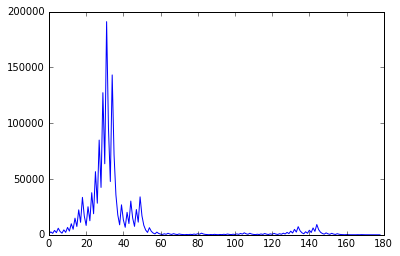

[871, 2614, 1307, 3922, 1961, 5884, 2942, 1471, 4414, 2207, 6622, 3311, 9934, 4967, 14902, 7451, 22354, 11177, 33532, 16766, 8383, 25150, 12575, 37726, 18863, 56590, 28295, 84886, 42443, 127330, 63665, 190996, 95498, 47749, 143248, 71624, 35812, 17906, 8953, 26860, 13430, 6715, 20146, 10073, 30220, 15110, 7555, 22666, 11333, 34000, 17000, 8500, 4250, 2125, 6376, 3188, 1594, 797, 2392, 1196, 598, 299, 898, 449, 1348, 674, 337, 1012, 506, 253, 760, 380, 190, 95, 286, 143, 430, 215, 646, 323, 970, 485, 1456, 728, 364, 182, 91, 274, 137, 412, 206, 103, 310, 155, 466, 233, 700, 350, 175, 526, 263, 790, 395, 1186, 593, 1780, 890, 445, 1336, 668, 334, 167, 502, 251, 754, 377, 1132, 566, 283, 850, 425, 1276, 638, 319, 958, 479, 1438, 719, 2158, 1079, 3238, 1619, 4858, 2429, 7288, 3644, 1822, 911, 2734, 1367, 4102, 2051, 6154, 3077, 9232, 4616, 2308, 1154, 577, 1732, 866, 433, 1300, 650, 325, 976, 488, 244, 122, 61, 184, 92, 46, 23, 70, 35, 106, 53, 160, 80, 40, 20, 10, 5, 16, 8, 4, 2, 1]


In [70]:
import matplotlib.pyplot as plt
import numpy as np

cseq = np.array(collatz(871))

plt.plot(range(len(cseq)),cseq)
plt.show()

print(cseq)